# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [6]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

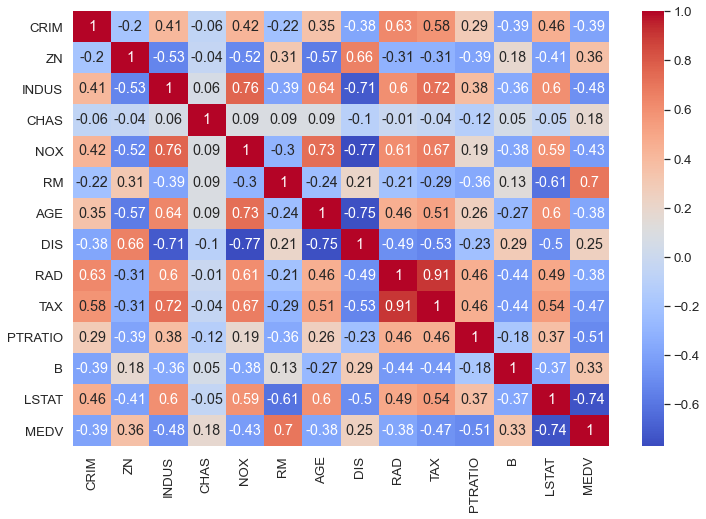

In [7]:
df_add = pd.concat([X,y], axis=1)
df = pd.DataFrame(df_add)


correlation_matrix = df.corr().round(2)

sns.set(font_scale=1.2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### 3. Separe os dados em validação e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [9]:
tree1 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree1.fit(X_train, y_train)


tree2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [10]:
from sklearn.metrics import mean_squared_error


y_pred_train1 = tree1.predict(X_train)
mse_train1 = mean_squared_error(y_train, y_pred_train1)
y_pred_test1 = tree1.predict(X_test)
mse_test1 = mean_squared_error(y_test, y_pred_test1)
print("MSE da árvore com profundidade máxima = 8 (treinamento):", mse_train1)
print("MSE da árvore com profundidade máxima = 8 (teste):", mse_test1)


y_pred_train2 = tree2.predict(X_train)
mse_train2 = mean_squared_error(y_train, y_pred_train2)
y_pred_test2 = tree2.predict(X_test)
mse_test2 = mean_squared_error(y_test, y_pred_test2)
print("MSE da árvore com profundidade máxima = 2 (treinamento):", mse_train2)
print("MSE da árvore com profundidade máxima = 2 (teste):", mse_test2)


MSE da árvore com profundidade máxima = 8 (treinamento): 1.9490192185625448
MSE da árvore com profundidade máxima = 8 (teste): 8.978508612023766
MSE da árvore com profundidade máxima = 2 (treinamento): 25.654637281631615
MSE da árvore com profundidade máxima = 2 (teste): 25.993190895971196


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Analisando os valores de MSE para as duas árvores, podemos perceber que a árvore com profundidade máxima = 8 apresentou um desempenho melhor, pois apresentou um MSE menor tanto para a base de treinamento quanto para a base de teste. Isso indica que essa árvore é capaz de fazer previsões mais precisas e pode ser mais adequada para o conjunto de dados em questão.

Por outro lado, a árvore com profundidade máxima = 2 apresentou um desempenho pior, indicando que ela não conseguiu capturar toda a complexidade dos dados e provavelmente está sofrendo de underfitting

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

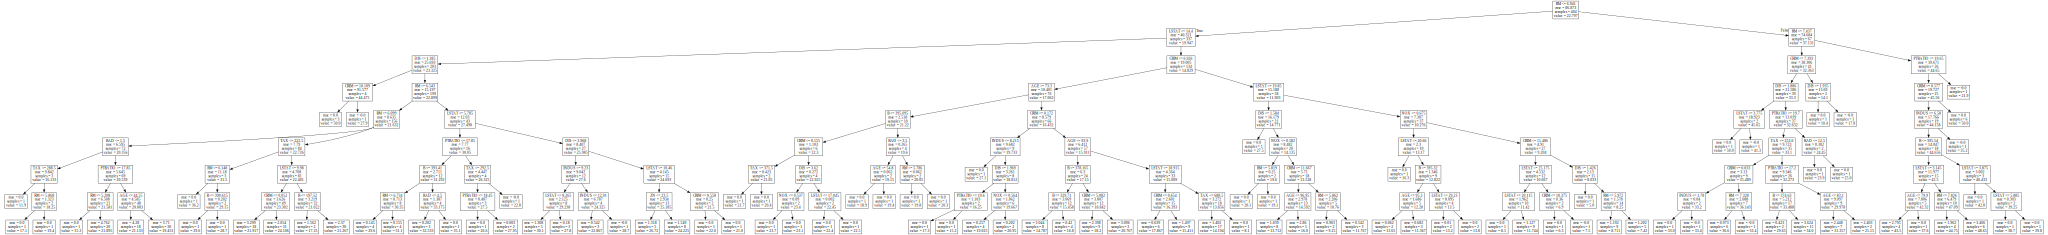

In [11]:
from sklearn.tree import export_graphviz
import graphviz


dot_LasDataOrig = tree.export_graphviz(tree1,  out_file=None, feature_names=boston.feature_names)

graph = graphviz.Source(dot_LasDataOrig)
graph
